# Exploratory Analysis: Kai Miller's ECoG data for motion imagery

In [2]:
from load_data import (get_all_data, get_subject_data, get_raw, get_epochs, get_mean_evokeds)

# Data from NMA
ECoG_data =  get_all_data()
# get data for 1st subject, session i.e. when real movements were done
subject_data = get_subject_data(ECoG_data, subject=0, session=0)


# convert to MNE data formats

# raw data without any event markings
raw = get_raw(subject_data)
# what event ids refer to (info not available inside sub data given, taken from readme text)
event_ids = dict(rest=10, tongue=11, hand=12)
# mark raw data and divide into separate events
epochs = get_epochs(subject_data, event_ids)
# average over each event type
evokeds = get_mean_evokeds(epochs)


Creating RawArray with float64 data, n_channels=46, n_times=376400
    Range : 0 ... 376399 =      0.000 ...   376.399 secs
Ready.
Creating RawArray with float64 data, n_channels=46, n_times=376400
    Range : 0 ... 376399 =      0.000 ...   376.399 secs
Ready.
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


In [3]:
# what do epochs look like?
print(epochs.get_data().shape)
## 119 refers to all the different trials
## 46 refers to all 46 channels
## 3001 are all the time points - 
## - with 1000 hz sampling freq, meaning each hand movement trial was 3 second long

# for one specific event type, say rest trials
print(epochs['rest'].get_data().shape)
## 59 rest trials when no movement was happening
print(epochs['tongue'].get_data().shape)
## 30 tongue movement trials
print(epochs['hand'].get_data().shape)
## 30 hand movement trials


Using data from preloaded Raw for 119 events and 3001 original time points ...
0 bad epochs dropped
(119, 46, 3001)
Using data from preloaded Raw for 59 events and 3001 original time points ...
(59, 46, 3001)
Using data from preloaded Raw for 30 events and 3001 original time points ...
(30, 46, 3001)
Using data from preloaded Raw for 30 events and 3001 original time points ...
(30, 46, 3001)


In [4]:
# what do averaged evokeds look like
print(type(evokeds))
## a list
print(len(evokeds))
## 3 evoked arrays for each event type

for i in range(len(evokeds)):
    # which one is which?
    print(evokeds[i].comment)
    # what have the epochs been averaged over? event types? channels? timepoints?
    print(evokeds[i].data.shape)
    ## 46 channels and 3001 time points still intact,
    ## meaning average was over event types

<class 'list'>
3
rest
(46, 3001)
tongue
(46, 3001)
hand
(46, 3001)


Using data from preloaded Raw for 30 events and 3001 original time points ...
(4141380,)
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...


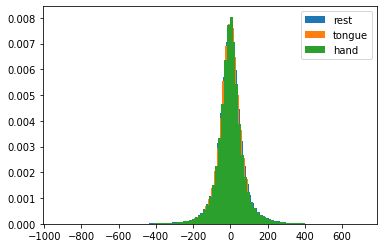

In [5]:
# let's see how the data is distributed
import numpy as np
import matplotlib.pyplot as plt

# flatten tongue data array
print(epochs['tongue'].get_data().flatten().shape)

# is there any difference in how the potentials are distributed between event types
for event_id in ['rest', 'tongue', 'hand']:
    flat_arr = epochs[event_id].get_data().flatten()*(10**6)
    plt.hist(flat_arr, bins=100, density=True, label=event_id)
plt.legend()

## no distributions look very similar

Using data from preloaded Raw for 59 events and 3001 original time points ...
(59, 3001)
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 

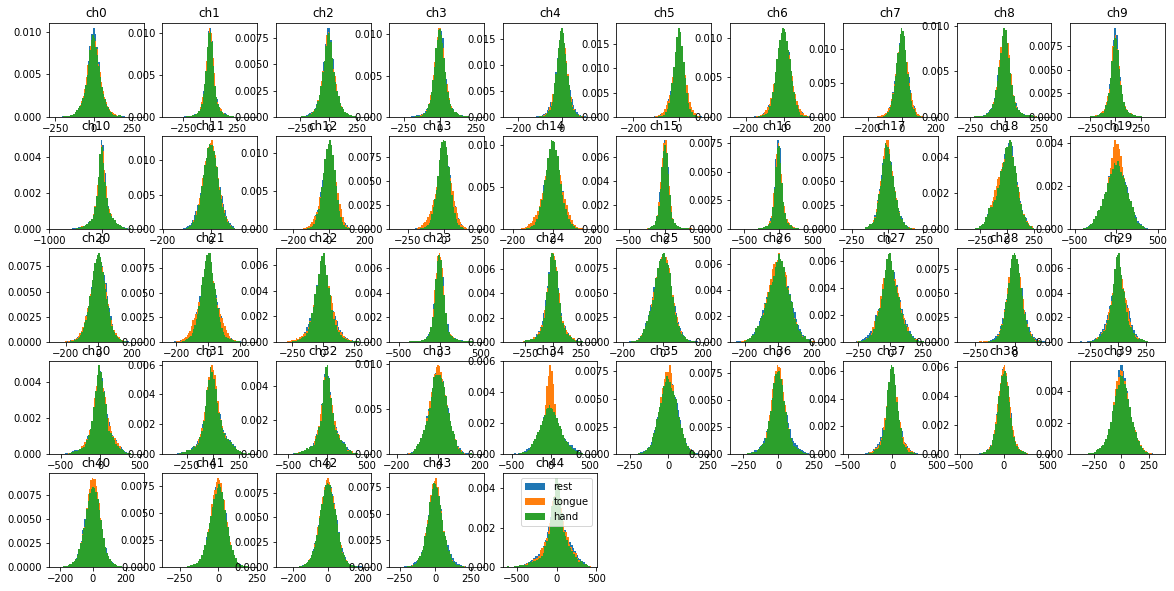

In [6]:
# maybe that's because we are plotting over all the electrodes
# some specific electrodes might have diff distribution than others for different events
# let's plot the same histo for each electrode now

print(epochs['rest'].get_data()[:,0,:].shape)

plt.figure(figsize=(20, 10))
for elect in range(0,45):
    ax = plt.subplot(5, 10, elect+1)

    for event_id in ['rest', 'tongue', 'hand']:
        flat_arr = epochs[event_id].get_data()[:,elect,:].flatten()*(10**6)
        plt.hist(flat_arr, bins=50, label=event_id, density=True)

    plt.title('ch%d'%elect)

plt.legend()

## the distributions for different event types look very similar for each electrode a well

Using data from preloaded Raw for 59 events and 3001 original time points ...
(59, 1001)
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 

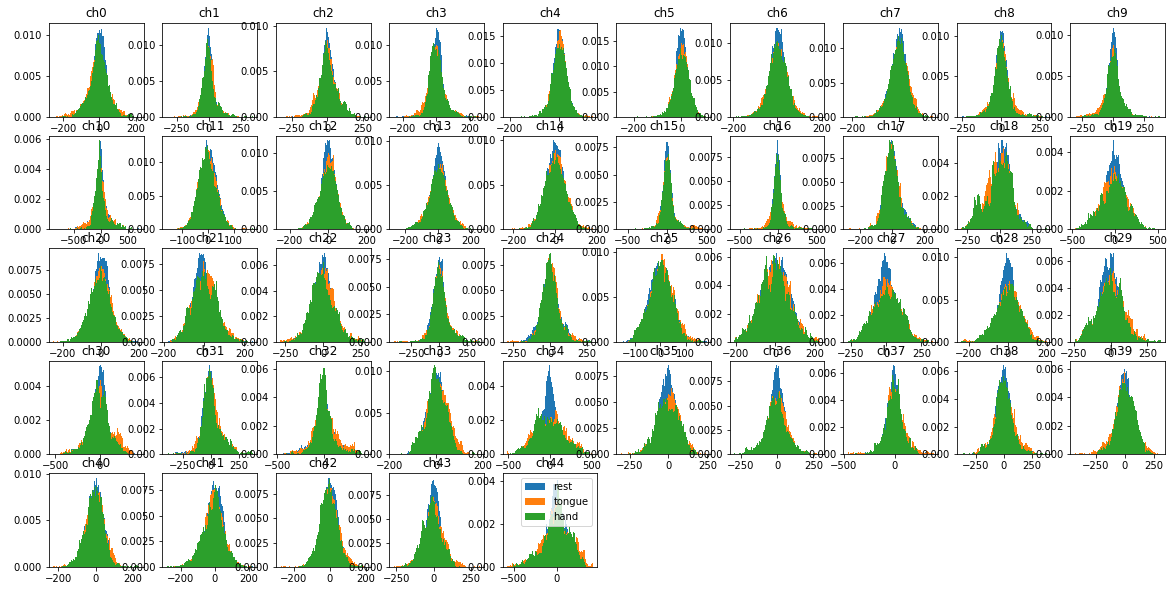

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

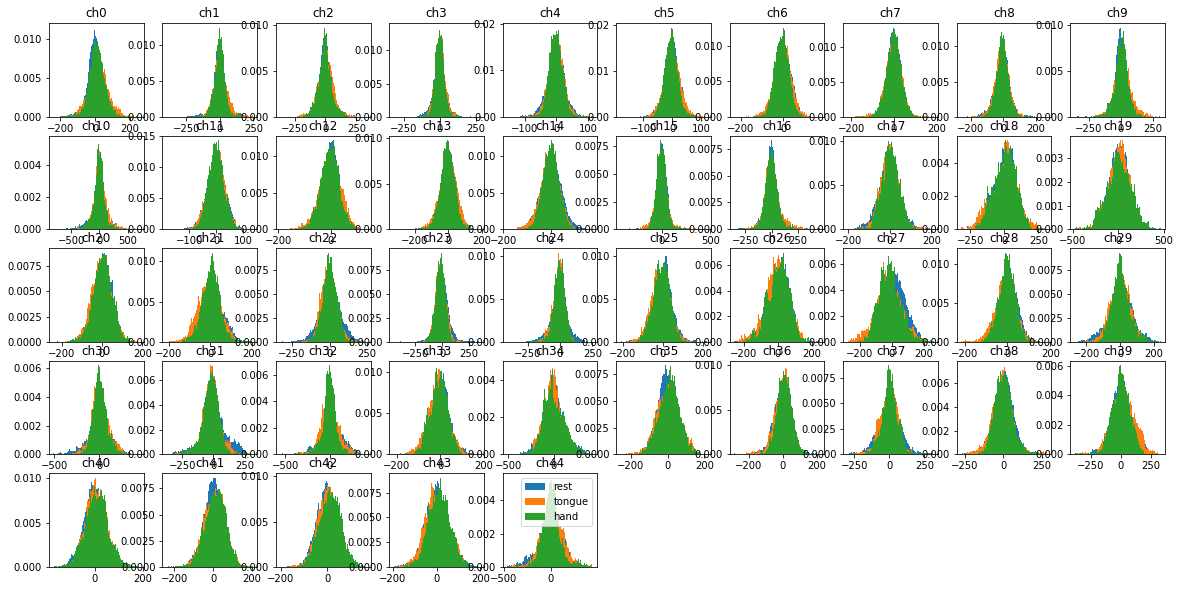

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

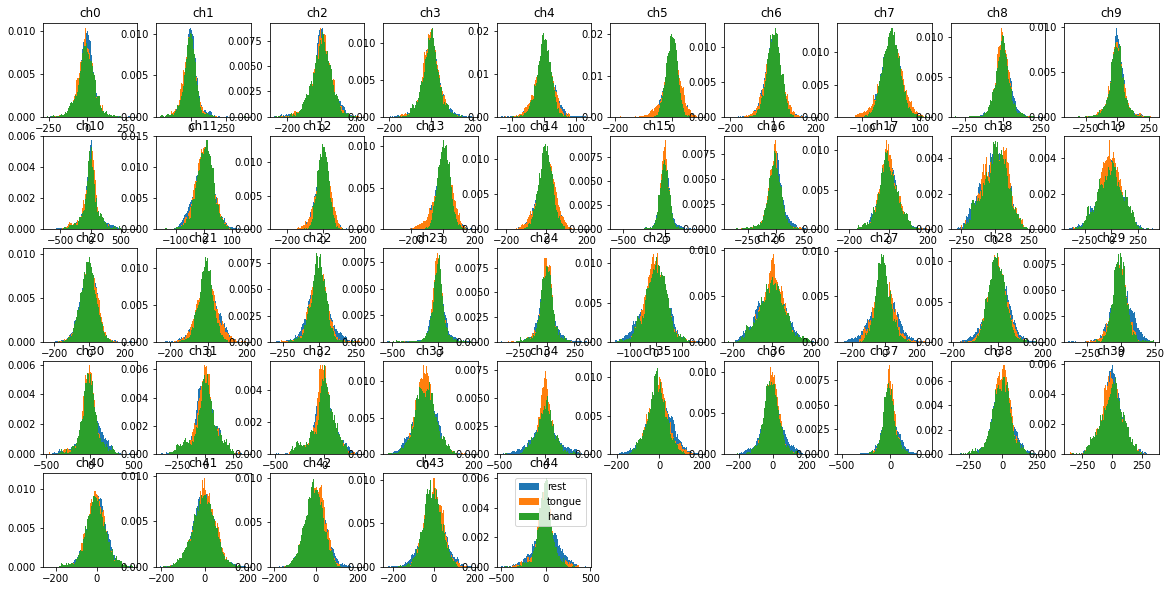

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

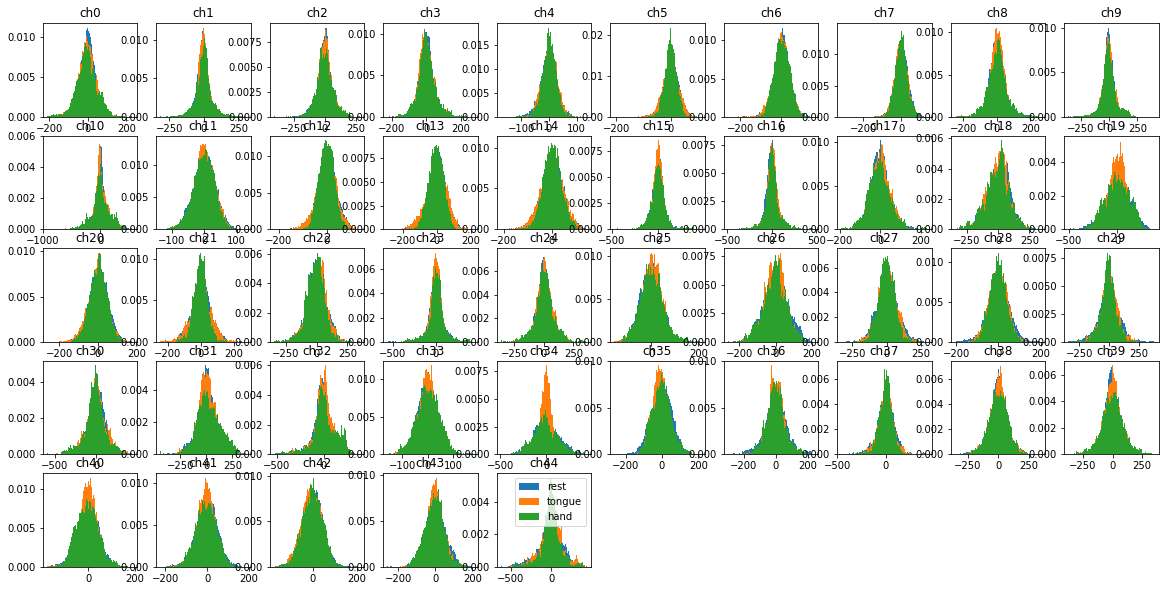

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

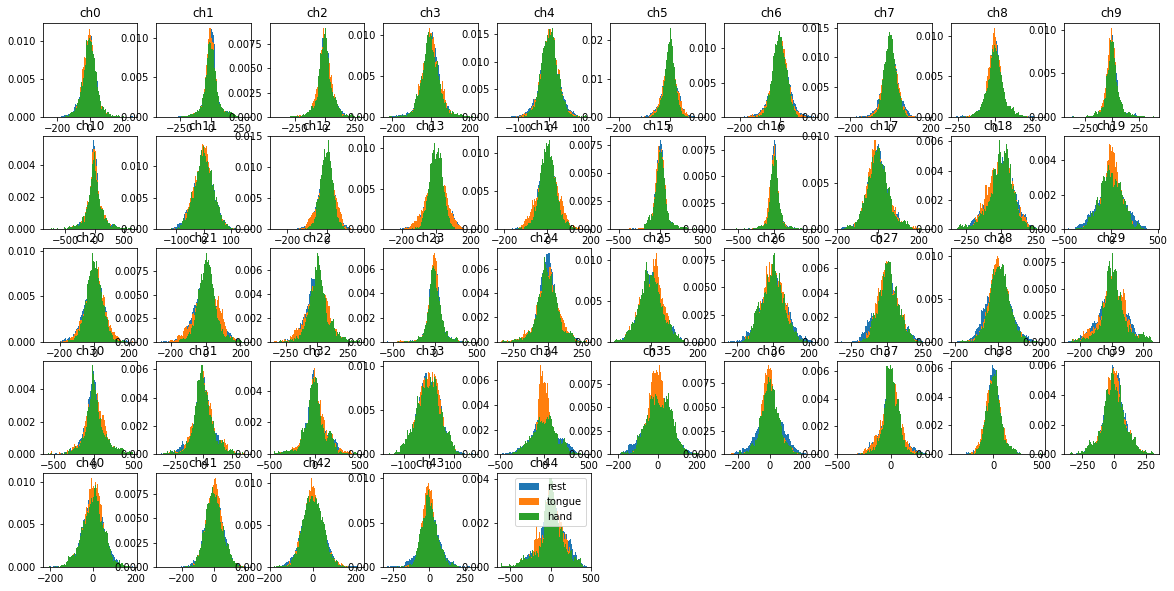

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

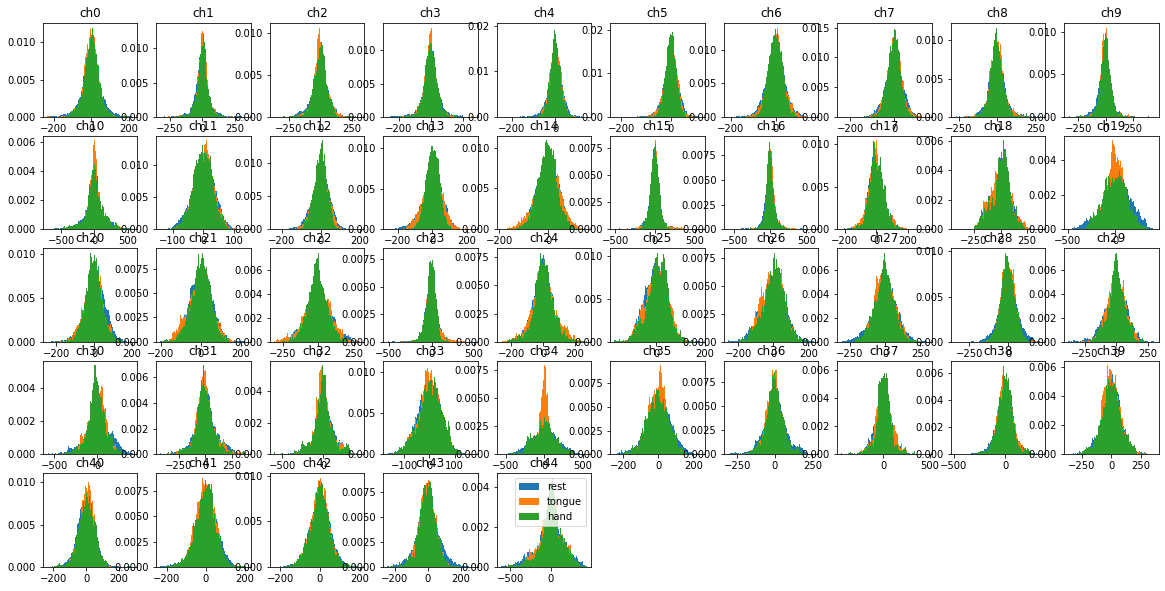

In [7]:
# maybe the potential amplitudes from diff event types were distributed differently... 
# ... during specific time intervals?

# cropping and keeping the first second
print(epochs['rest'].load_data().crop(tmin=0, tmax=1).get_data()[:,0,:].shape)

for time_range in [(0,0.5),(0.5,1),(1,1.5),(1.5,2),(2,2.5),(2.5,3)]:
    plt.figure(figsize=(20, 10))
    for elect in range(0,45):
        ax = plt.subplot(5, 10, elect+1)

        for event_id in ['rest', 'tongue', 'hand']:
            cropped = epochs[event_id].load_data().crop(tmin=time_range[0], tmax=time_range[1])
            flat_arr = cropped.get_data()[:,elect,:].flatten()*(10**6)
            plt.hist(flat_arr, bins=100, label=event_id, density=True)

        plt.title('ch%d'%elect)

    plt.legend()
    plt.show()


Using data from preloaded Raw for 119 events and 3001 original time points ...
(119, 46, 3001)
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and

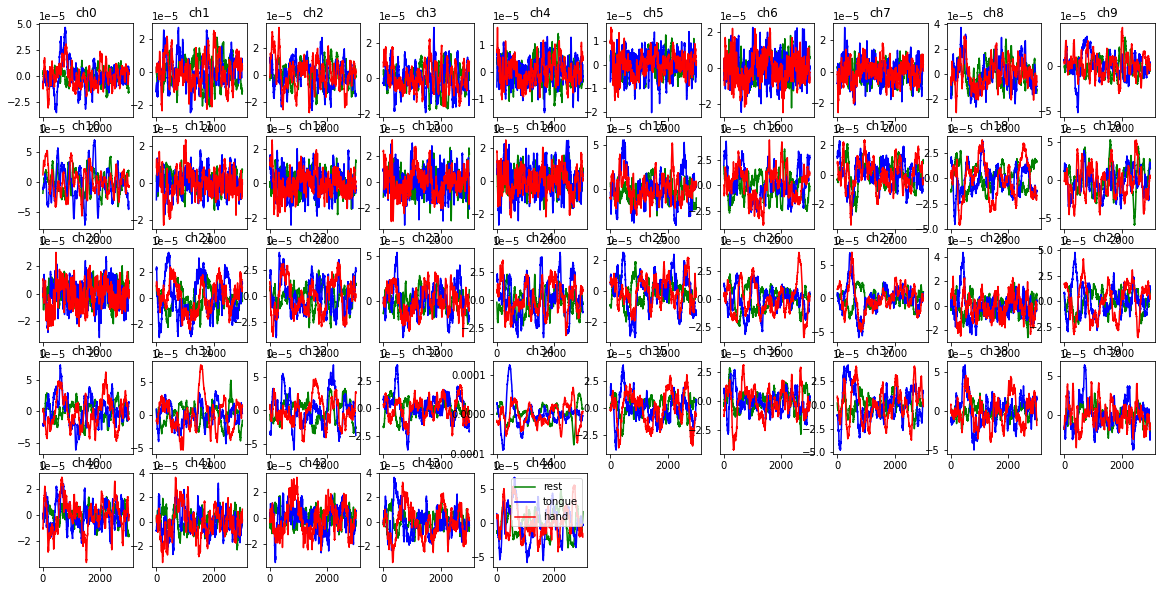

In [8]:
print(epochs.get_data().shape)

plt.figure(figsize=(20, 10))
for elect in range(0,45):
    ax = plt.subplot(5, 10, elect+1)

    for event_id, color in zip(['rest', 'tongue', 'hand'], ['green', 'blue', 'red']):
        data = epochs[event_id].get_data()
        av_ts = np.mean(data[:,elect,0:3000], axis=0)
        plt.plot(av_ts, color=color, label=event_id)

    plt.title('ch%d'%elect)

plt.legend()

Using data from preloaded Raw for 30 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 30 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 59 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


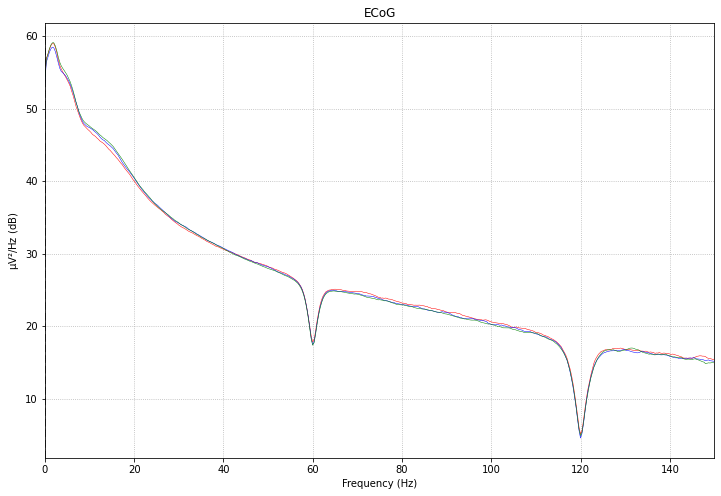

In [9]:
# looks like there's no discriminatory info in the potential distributions
# lets see if there are some frequency band that look different

fig, ax = plt.subplots(1,1, figsize=(12,8))


epochs['hand'].plot_psd(fmin=0, fmax=150, average=True, ax=ax, show=False,
                        color='red', area_mode=None)
epochs['tongue'].plot_psd(fmin=0, fmax=150, average=True, ax=ax, show=False,
                        color='blue', area_mode=None)
epochs['rest'].plot_psd(fmin=0, fmax=150, average=True, ax=ax, show=False,
                        color='green', area_mode=None)

# plt.legend(labels=['hand','tongue','rest'])

plt.show(ax)

## EVEN THE POWER SPECTRA DON'T LOOK THAT DIFFERENT WHEN WE AVERAGE OVER ALL CHANNELS 


Using data from preloaded Raw for 30 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 30 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 59 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


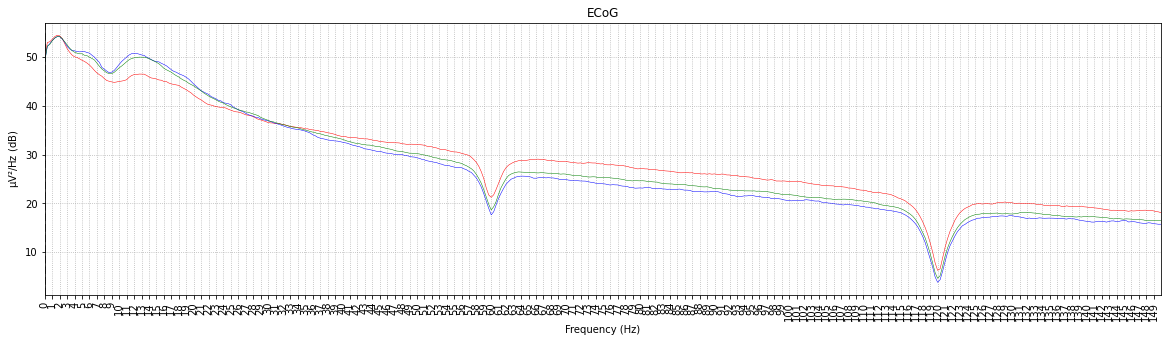

In [10]:
# lets pick the channels that looked most different in butterworth analysis done in
# jupyter nb that came with the data

fig, ax = plt.subplots(1,1, figsize=(20,5))


epochs['hand'].plot_psd(fmin=0, fmax=150, average=True, ax=ax, show=False,
                        picks=['6','12','13','14','20','21'],
                        color='red', area_mode=None)
epochs['tongue'].plot_psd(fmin=0, fmax=150, average=True, ax=ax, show=False,
                        picks=['6','12','13','14','20','21'],
                          color='blue', area_mode=None)
epochs['rest'].plot_psd(fmin=0, fmax=150, average=True, ax=ax, show=False,
                        picks=['6','12','13','14','20','21'],
                        color='green', area_mode=None)

# plt.legend(labels=['hand','tongue','rest'])
plt.xticks([* range(0, 150)], rotation=90)
plt.show(ax)

## SO THERE ARE SOME SPECIFIC CHANNELS THAT SHOW THE DIFFERENCE
## MEANING WE NEED TO PICK SPECIFIC FREQUENCIES AS WELL AS CHANNELS THAT SHOW MOST DIFFERENCE

Using data from preloaded Raw for 30 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 30 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 59 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


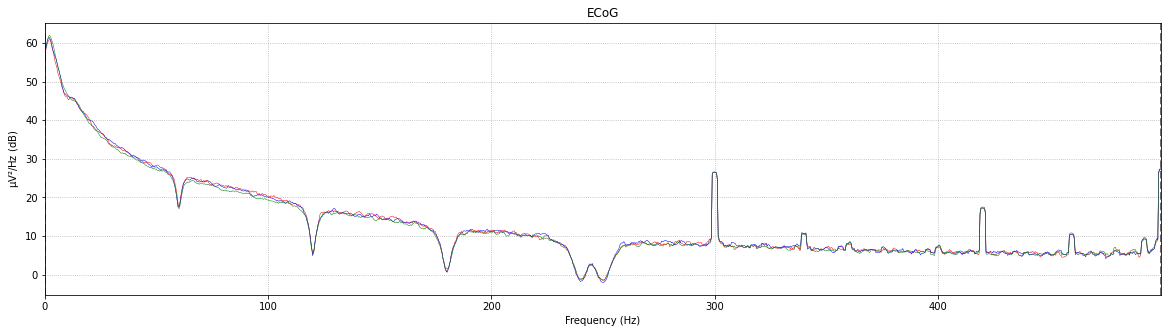

In [11]:
# lets pick the channels that looked most different in butterworth analysis done in
# jupyter nb that came with the data

fig, ax = plt.subplots(1,1, figsize=(20,5))


epochs['hand'].plot_psd(fmin=0, average=True, ax=ax, show=False,
                        picks=['27'],
                        color='red', area_mode=None)
epochs['tongue'].plot_psd(fmin=0, average=True, ax=ax, show=False,
                        picks=['27'],
                          color='blue', area_mode=None)
epochs['rest'].plot_psd(fmin=0, average=True, ax=ax, show=False,
                        picks=['27'],
                        color='green', area_mode=None)

# plt.legend(labels=['hand','tongue','rest'])
# plt.xticks([* range(0, 150)], rotation=90)
plt.show(ax)

## SO THERE ARE SOME SPECIFIC CHANNELS THAT SHOW THE DIFFERENCE
## MEANING WE NEED TO PICK SPECIFIC FREQUENCIES AS WELL AS CHANNELS THAT SHOW MOST DIFFERENCE

Using data from preloaded Raw for 30 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 30 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Using data from preloaded Raw for 59 events and 3001 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


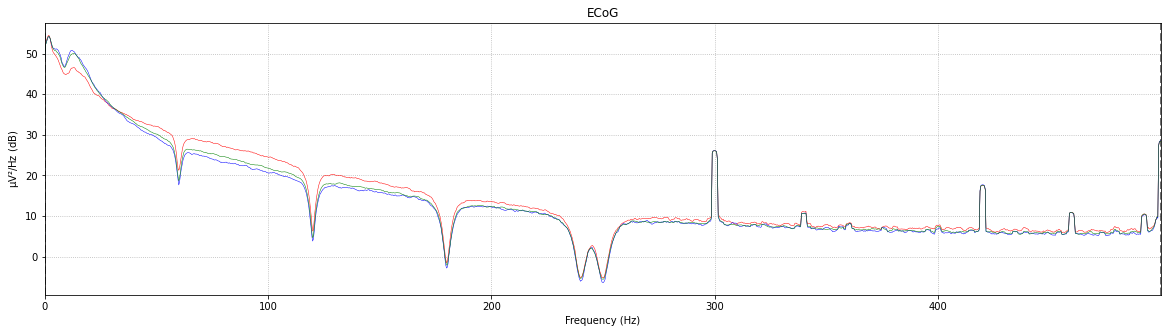

In [12]:
# lets pick the channels that looked most different in butterworth analysis done in
# jupyter nb that came with the data

fig, ax = plt.subplots(1,1, figsize=(20,5))


epochs['hand'].plot_psd(fmin=0, average=True, ax=ax, show=False,
                        picks=['6','12','13','14','20','21'],
                        color='red', area_mode=None)
epochs['tongue'].plot_psd(fmin=0, average=True, ax=ax, show=False,
                        picks=['6','12','13','14','20','21'],
                          color='blue', area_mode=None)
epochs['rest'].plot_psd(fmin=0, average=True, ax=ax, show=False,
                        picks=['6','12','13','14','20','21'],
                        color='green', area_mode=None)

# plt.legend(labels=['hand','tongue','rest'])
# plt.xticks([* range(0, 150)], rotation=90)
plt.show(ax)

## SO THERE ARE SOME SPECIFIC CHANNELS THAT SHOW THE DIFFERENCE
## MEANING WE NEED TO PICK SPECIFIC FREQUENCIES AS WELL AS CHANNELS THAT SHOW MOST DIFFERENCE

In [13]:
# looking at the power spectra, let's filter out all frequencies lower than 70 and above 115 hz

filtered_epochs = epochs.load_data().copy().filter(70, 115)

Using data from preloaded Raw for 119 events and 3001 original time points ...
Setting up band-pass filter from 70 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 115.00 Hz
- Upper transition bandwidth: 28.75 Hz (-6 dB cutoff frequency: 129.38 Hz)
- Filter length: 189 samples (0.189 sec)



(119, 46, 3001)


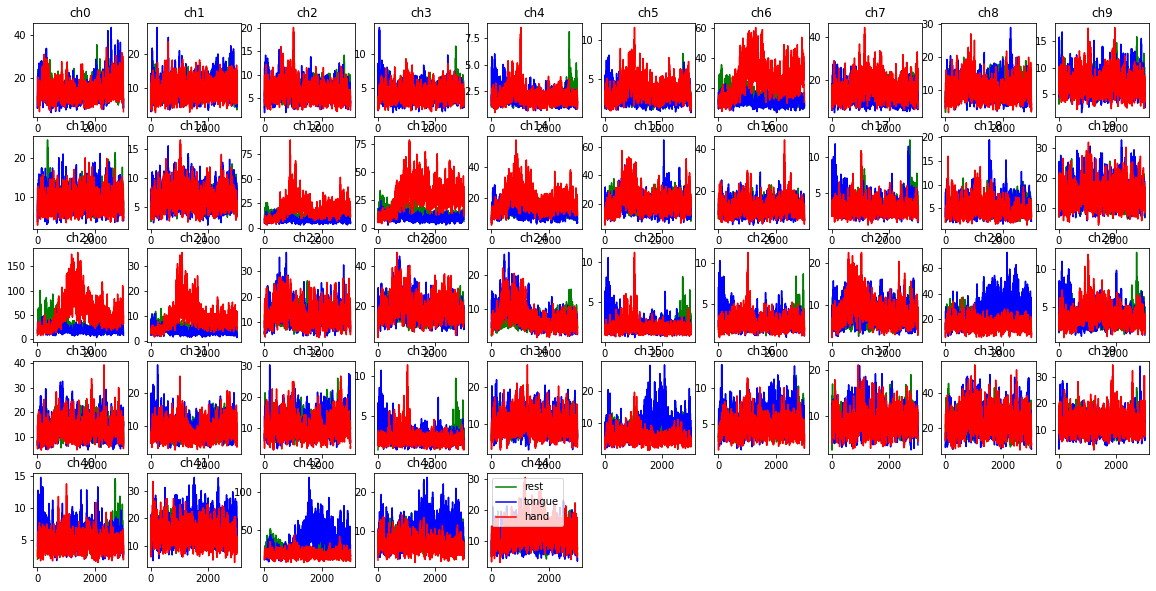

In [14]:
print(filtered_epochs.get_data().shape)

plt.figure(figsize=(20, 10))
for elect in range(0,45):
    ax = plt.subplot(5, 10, elect+1)

    for event_id, color in zip(['rest', 'tongue', 'hand'], ['green', 'blue', 'red']):
        power = (filtered_epochs[event_id].get_data()*(10**6))**2
        av_filt_ts = np.mean(power[:,elect,:], axis=0)
        plt.plot(av_filt_ts, color=color, label=event_id)

    plt.title('ch%d'%elect)

plt.legend()

(59, 3001)


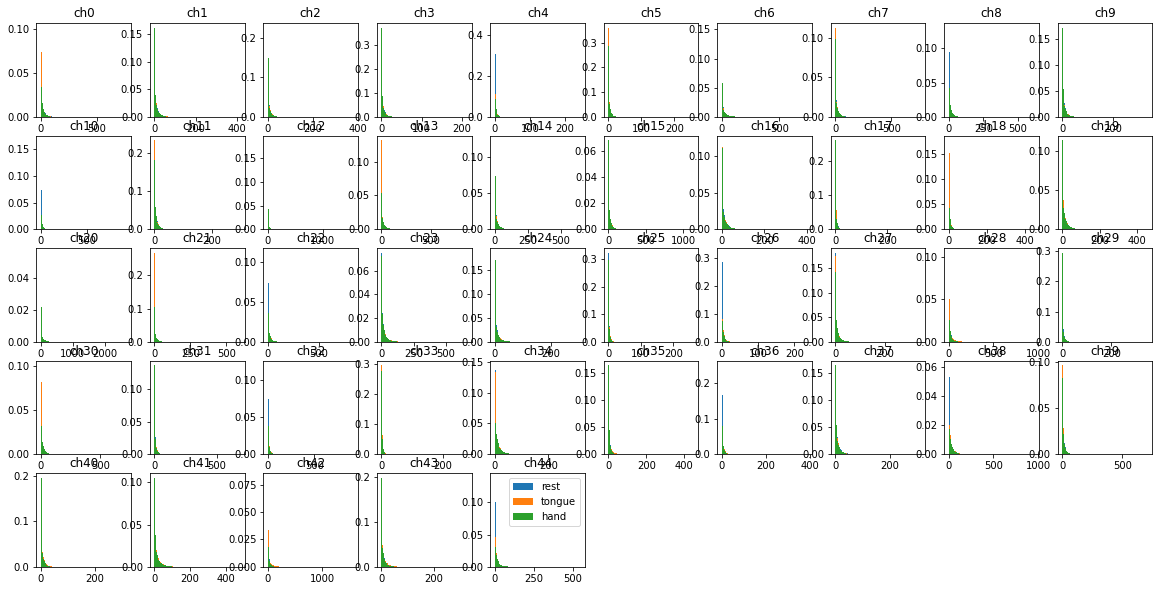

In [15]:
# let's see how the filtered power are distributed
print(epochs['rest'].get_data()[:,0,:].shape)

plt.figure(figsize=(20, 10))
for elect in range(0,45):
    ax = plt.subplot(5, 10, elect+1)

    for event_id in ['rest', 'tongue', 'hand']:
        power = (filtered_epochs[event_id].get_data()*(10**6))**2
        flat_arr = power[:,elect,:].flatten()
        # thresh_flat_arr = np.zeros_like(flat_arr)
        # np.clip(flat_arr, 10, None, thresh_flat_arr)
        plt.hist(flat_arr, bins=100, label=event_id, density=True)

    plt.title('ch%d'%elect)

plt.legend()

In [16]:
# so again some channels show different powers
# let's determine the most distinctive channels using GLM

# %load_ext autoreload

# %autoreload 3

# from glm import run_glm

# theta, y_hat = run_glm(sub=0, sess=0)

# theta, y_hat = run_glm(sub=0, sess=0, poisson=True)

In [20]:
from glm import get_mne_data

events, event_ids, raw, epochs, evokeds = get_mne_data(subject=0, session=0, epoch_with_rest=True)

Creating RawArray with float64 data, n_channels=46, n_times=376400
    Range : 0 ... 376399 =      0.000 ...   376.399 secs
Ready.
Creating RawArray with float64 data, n_channels=46, n_times=376400
    Range : 0 ... 376399 =      0.000 ...   376.399 secs
Ready.
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [22]:
import mne

freq_filt_epochs = epochs.load_data().copy().filter(70, 115)
power_y = (freq_filt_epochs['hand'].get_data()*(10**6))**2
filt_power_y = mne.filter.filter_data(power_y, 1000, 0, 20)

Setting up band-pass filter from 70 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 115.00 Hz
- Upper transition bandwidth: 28.75 Hz (-6 dB cutoff frequency: 129.38 Hz)
- Filter length: 189 samples (0.189 sec)

Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 661 samples (0.661 sec)



In [23]:
filt_power_y.shape


(30, 46, 6001)

In [25]:
behaviour = np.concatenate([np.zeros(3000), 150*np.ones(3000)])

Text(0.5, 1.0, 'y_sub-0_ses-0_trial-0_electrode-13_cond-hand')

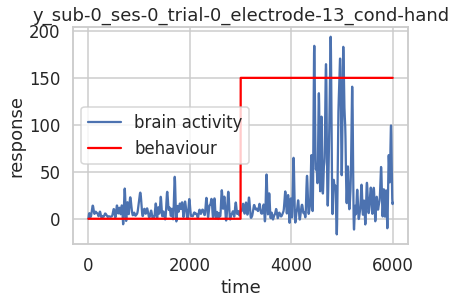

In [44]:
import seaborn as sns

sns.set(context='talk')
sns.set_style("whitegrid")

plt.plot(filt_power_y[0, 13], label='brain activity')
plt.plot(behaviour, color='red', label='behaviour')
plt.xlabel('time')
plt.ylabel('response')
plt.legend()
plt.title('y_sub-0_ses-0_trial-0_electrode-13_cond-hand')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


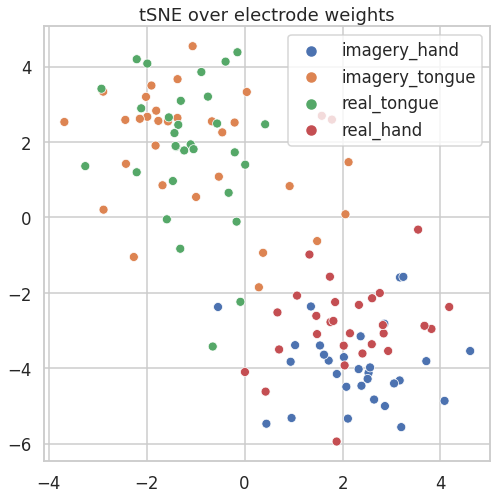

In [51]:

%load_ext autoreload

%autoreload 2

from glm import create_Xy, tsne

X, y = create_Xy(0, ['real', 'imagery'], only_sessions=False)
plt.figure(figsize=(8,8))
tsne(X, y)

In [64]:
%autoreload 2

from glm import create_Xy, decode

from decoder_model import postprocess_classif_metrics

score_dict = {}
for sub in range(0,7):
    X, y = create_Xy(sub, ['real', 'imagery'], only_sessions=False, only_motor=True)
    y_pred, y, lbl_corr = decode(X, y, XGB=True)
    score_dict['sbj_'+str(sub)] = {'y': y, 'y_pred': y_pred}

postprocess_classif_metrics(score_dict, 'XGBoost', lbl_corr, title='hand vs. tongue')
plt.xlabel('true')
plt.ylabel('predicted')

(120, 46) (120,)
(120, 64) (120,)
(120, 48) (120,)
(120, 48) (120,)
(120, 64) (120,)
(120, 64) (120,)
(120, 64) (120,)


     model subject  precison    recall        F1
0  XGBoost   sbj_0  0.633333  0.633333  0.633333
1  XGBoost   sbj_1      0.45      0.45      0.45
2  XGBoost   sbj_2  0.557692  0.483333  0.517857
3  XGBoost   sbj_3  0.526316       0.5  0.512821
4  XGBoost   sbj_4  0.490909      0.45  0.469565
5  XGBoost   sbj_5  0.555556       0.5  0.526316
6  XGBoost   sbj_6  0.509804  0.433333  0.468468


Text(55.5, 0.5, 'predicted')

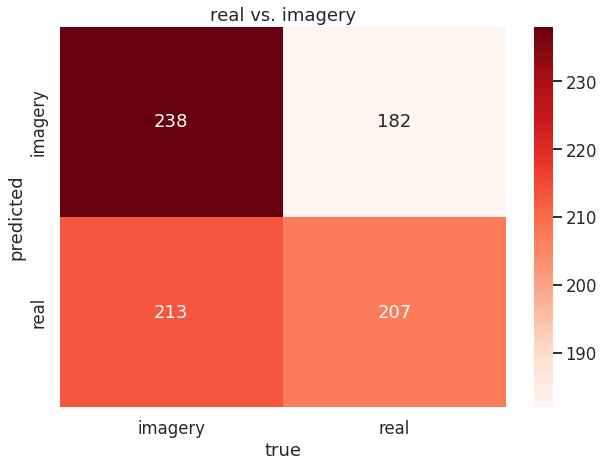

In [62]:
%autoreload 2

from glm import create_Xy, decode

from decoder_model import postprocess_classif_metrics

score_dict = {}
for sub in range(0,7):
    X, y = create_Xy(sub, ['real', 'imagery'], only_sessions=True, only_motor=False)
    y_pred, y, lbl_corr = decode(X, y, XGB=True)
    score_dict['sbj_'+str(sub)] = {'y': y, 'y_pred': y_pred}

postprocess_classif_metrics(score_dict, 'XGBoost', lbl_corr, title='real vs. imagery')
plt.xlabel('true')
plt.ylabel('predicted')